<h1>HR ANALYTICS : PREDICTING EMPLOYEE ATTRITION</h1>

<h3>Import Libraries</h3>
We begin by importing necessary libraries for data manipulation, visualisation, and model building. Libraries such as pandas and Scikit-learn will help us handle data and train models, while Seaborn and Matplotlib will be used to create insightful visualisations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import svm
%matplotlib inline

## Data Insertion And Exploratory Data Analysis

In [2]:
df = pd.read_csv("C:/Users/Pallak Sinha/Desktop/Files for data analysis/HR_Attrition_Indian_Dataset.csv")

In [3]:
#reading the data
df.head()

,EmployeeID,FullName,Age,Gender,Department,Designation,EducationQualification,MonthlySalary,DateOfJoining,YearsWithCompany,...,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,MaritalStatus,PreviousCompanies,DistanceFromHome,LeavesTaken,City,LeftCompany
0,EMP20230001,Sahil Tailor,48,Other,HR,Accounts Officer,B.Tech,111813,2020-05-26,5,...,37,Yes,4,3,Single,0,12.2,4,Mumbai,No
1,EMP20230002,Parinaaz Choudhary,26,Female,IT,Accounts Officer,B.Tech,87425,2020-10-02,5,...,39,No,2,2,Divorced,0,36.7,29,Kolkata,No
2,EMP20230003,Anahi Babu,40,Male,IT,Software Engineer,Diploma,86461,2021-05-01,4,...,32,No,2,3,Married,1,45.4,0,Bengaluru,Yes
3,EMP20230004,Dhruv Dass,54,Other,HR,Accounts Officer,Diploma,23720,2023-04-01,2,...,21,Yes,4,4,Married,0,29.9,27,Kolkata,No
4,EMP20230005,Seher Bal,51,Other,Admin,Sales Associate,B.Tech,39041,2018-12-19,7,...,30,No,2,2,Single,0,26.8,6,Delhi,Yes


In [4]:
#about the type of data values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              5000 non-null   object 
 1   FullName                5000 non-null   object 
 2   Age                     5000 non-null   int64  
 3   Gender                  5000 non-null   object 
 4   Department              5000 non-null   object 
 5   Designation             5000 non-null   object 
 6   EducationQualification  5000 non-null   object 
 7   MonthlySalary           5000 non-null   int64  
 8   DateOfJoining           5000 non-null   object 
 9   YearsWithCompany        5000 non-null   int64  
 10  YearsInRole             5000 non-null   int64  
 11  AppraisalRating         5000 non-null   int64  
 12  TrainingHours           5000 non-null   int64  
 13  DoesOvertime            5000 non-null   object 
 14  JobSatisfaction         5000 non-null   

In [5]:
#checking for null values
df.isnull().sum()

EmployeeID                0
FullName                  0
Age                       0
Gender                    0
Department                0
Designation               0
EducationQualification    0
MonthlySalary             0
DateOfJoining             0
YearsWithCompany          0
YearsInRole               0
AppraisalRating           0
TrainingHours             0
DoesOvertime              0
JobSatisfaction           0
WorkLifeBalance           0
MaritalStatus             0
PreviousCompanies         0
DistanceFromHome          0
LeavesTaken               0
City                      0
LeftCompany               0
dtype: int64

Since there is no null values in the dataset, we don't have to drop any rows or columns

In [6]:
#rows and columns in the dataset
df.shape

(5000, 22)

In [7]:
#checking for duplicate entries
df[df.duplicated()]

,EmployeeID,FullName,Age,Gender,Department,Designation,EducationQualification,MonthlySalary,DateOfJoining,YearsWithCompany,...,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,MaritalStatus,PreviousCompanies,DistanceFromHome,LeavesTaken,City,LeftCompany


## Descriptive Statistics

In [8]:
df.describe()

,Age,MonthlySalary,YearsWithCompany,YearsInRole,AppraisalRating,TrainingHours,JobSatisfaction,WorkLifeBalance,PreviousCompanies,DistanceFromHome,LeavesTaken
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000
mean,40.710000,68200.896200,5.578600,2.820400,2.98820,30.07780,2.990800,2.50220,2.508800,25.47184,14.917800
std,11.361079,30290.742577,2.615414,2.443305,1.40216,17.55775,1.407662,1.11868,1.718753,14.19387,8.972912
min,22.000000,15031.000000,1.000000,0.000000,1.00000,0.00000,1.000000,1.00000,0.000000,1.00000,0.000000
25%,31.000000,42086.000000,3.000000,1.000000,2.00000,15.00000,2.000000,2.00000,1.000000,13.17500,7.000000
50%,41.000000,68358.500000,6.000000,2.000000,3.00000,30.00000,3.000000,2.50000,3.000000,25.50000,15.000000
75%,51.000000,94889.500000,8.000000,4.000000,4.00000,45.00000,4.000000,4.00000,4.000000,37.70000,23.000000
max,60.000000,119878.000000,10.000000,10.000000,5.00000,60.00000,5.000000,4.00000,5.000000,50.00000,30.000000


# Using Plots & Graphs to analyse data

## Number of Employees who LeftCompany

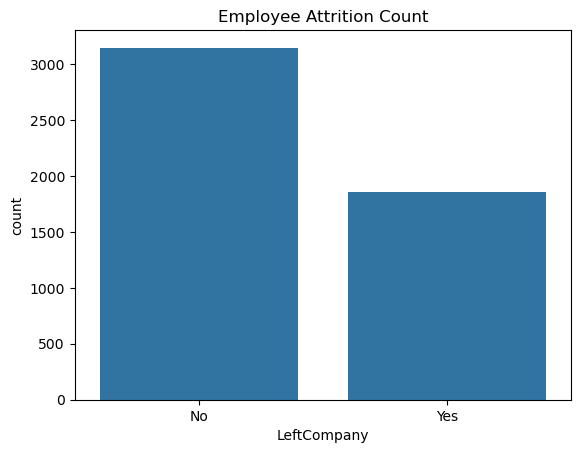

In [9]:
sns.countplot(x='LeftCompany', data=df)
plt.title("Employee Attrition Count")
plt.show()

## Encode categorical variables to numerical ones using LabelEncoder
We convert categorical variables into numerical values using Label Encoding, making the data suitable for machine learning algorithms. This step ensures our features are in a usable format for the model.

__Encoding LeftCompany = Yes/No to Yes = 1,  No = 0__;
__Encoding DoesOvertime = Yes/No to Yes = 1,  No = 0__;
__Encoding MaritalStatus to Single = 0, Married = 1, Divorced = 2__

In [10]:
label_encoder = LabelEncoder()

categorical_cols = ['DoesOvertime','MaritalStatus','LeftCompany']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,EmployeeID,FullName,Age,Gender,Department,Designation,EducationQualification,MonthlySalary,DateOfJoining,YearsWithCompany,...,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,MaritalStatus,PreviousCompanies,DistanceFromHome,LeavesTaken,City,LeftCompany
0,EMP20230001,Sahil Tailor,48,Other,HR,Accounts Officer,B.Tech,111813,2020-05-26,5,...,37,1,4,3,2,0,12.2,4,Mumbai,0
1,EMP20230002,Parinaaz Choudhary,26,Female,IT,Accounts Officer,B.Tech,87425,2020-10-02,5,...,39,0,2,2,0,0,36.7,29,Kolkata,0
2,EMP20230003,Anahi Babu,40,Male,IT,Software Engineer,Diploma,86461,2021-05-01,4,...,32,0,2,3,1,1,45.4,0,Bengaluru,1
3,EMP20230004,Dhruv Dass,54,Other,HR,Accounts Officer,Diploma,23720,2023-04-01,2,...,21,1,4,4,1,0,29.9,27,Kolkata,0
4,EMP20230005,Seher Bal,51,Other,Admin,Sales Associate,B.Tech,39041,2018-12-19,7,...,30,0,2,2,2,0,26.8,6,Delhi,1


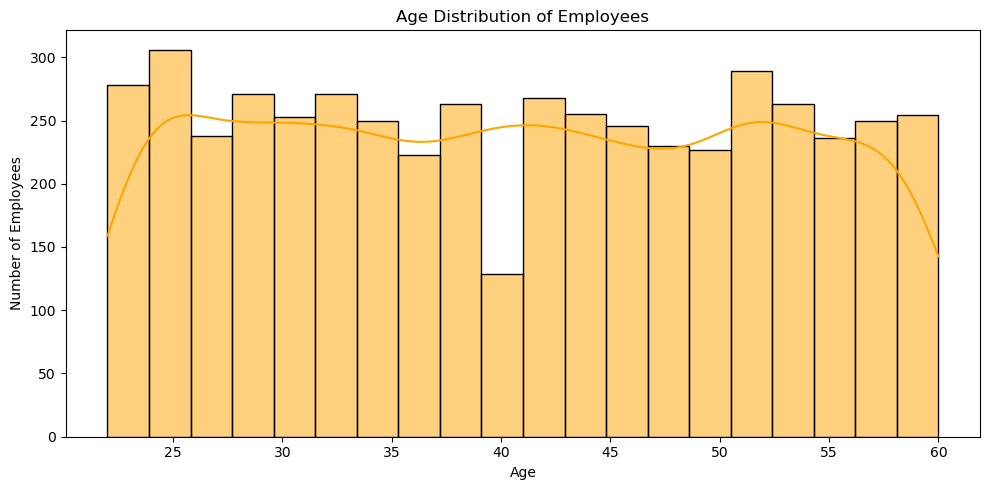

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["Age"], kde=True, bins=20, color='orange')
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

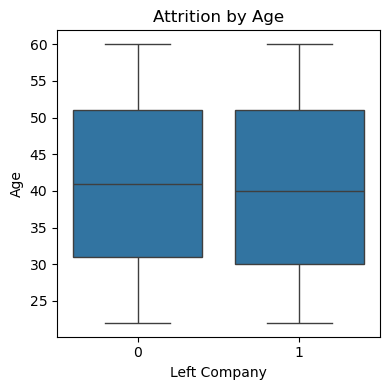

In [12]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x="LeftCompany", y="Age")
plt.title("Attrition by Age")
plt.xlabel("Left Company")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

The variability of the employees leaving and staying in the company is almost similar. The median of employees who left the company is lower than that of those who stayed, means people who are younger are more likely to leave rather than those who are more than 35-40 years of age.

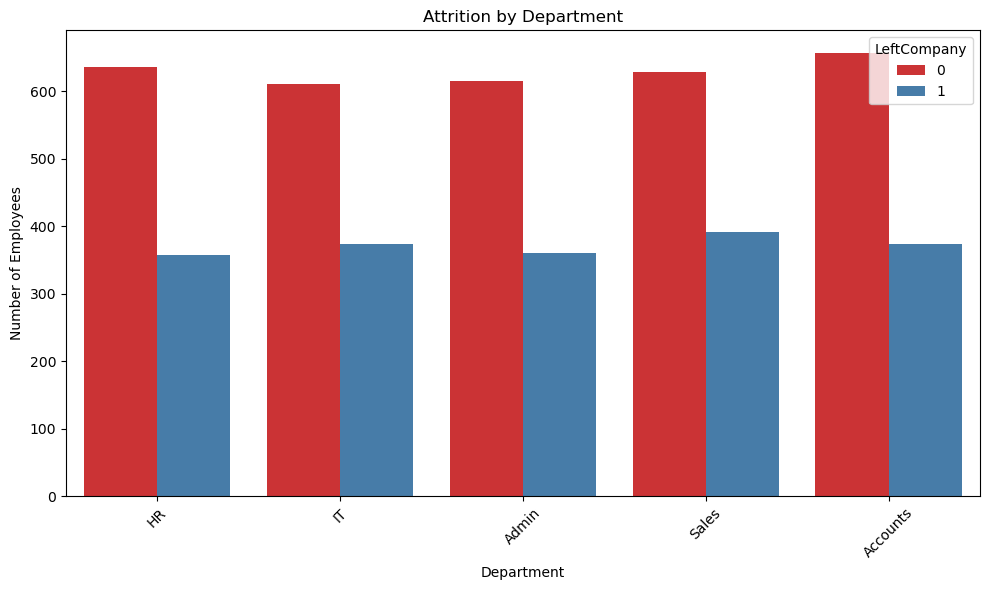

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Department", hue="LeftCompany", palette="Set1")
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The department that has the highest attrition is Sales, then Accounts & IT.

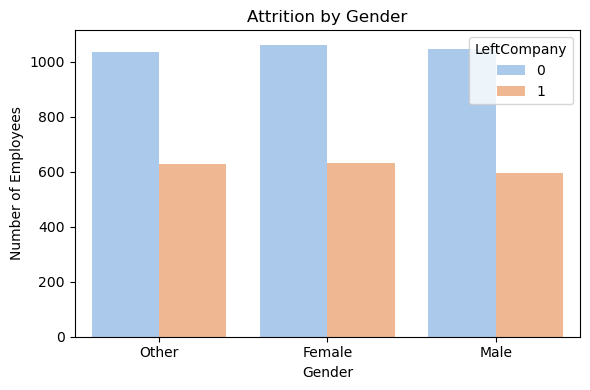

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="LeftCompany", palette="pastel")
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

There is not much difference among the genders who LeftCompany, so Gender is not "the" reason for leaving.

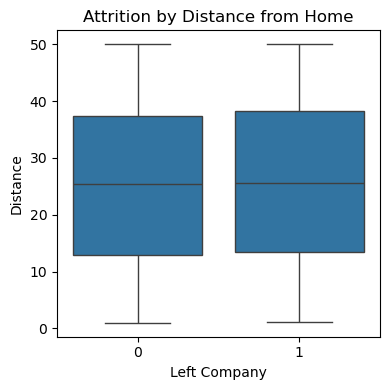

In [15]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df, x="LeftCompany", y="DistanceFromHome")
plt.title("Attrition by Distance from Home")
plt.xlabel("Left Company")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

The median, variability and tail so similar shows us that distance from home is not a major reason for leaving while the spread of the people who left company is slightly raised means that travelling far could become one of the reasons to leave.

## Plotting different variables against Target Value=LeftCompany to understand the reason for attrition
Using code to build a single command for different variable plots

In [16]:
def NumericalVariables_targetPlots(df, segment_by, target_var="LeftCompany"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    plt.close('all')  # clear any previous plots

    fig, ax = plt.subplots(ncols=2, figsize=(14, 6))    

    # Boxplot
    sns.boxplot(x=target_var, y=segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparison of " + segment_by + " vs " + target_var)
    
    # Histogram
    sns.histplot(x=df[segment_by], ax=ax[1], kde=False)
    ax[1].set_title("Distribution of " + segment_by)
    ax[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

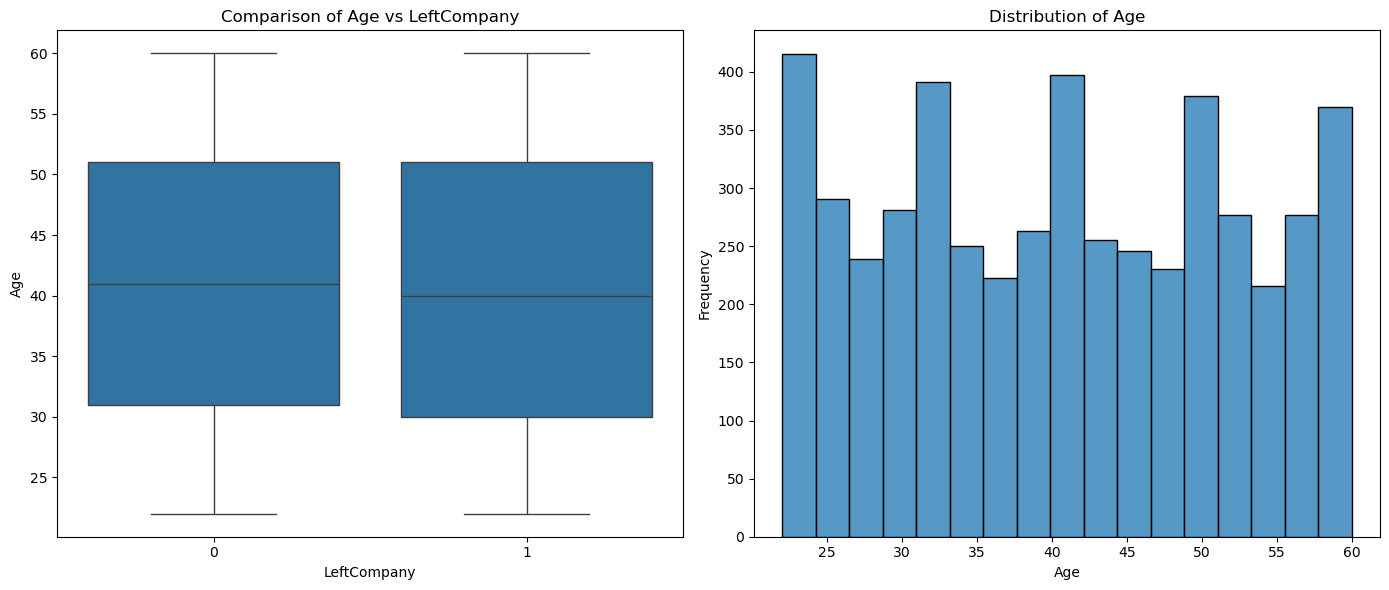

In [17]:
NumericalVariables_targetPlots(df,segment_by="Age")

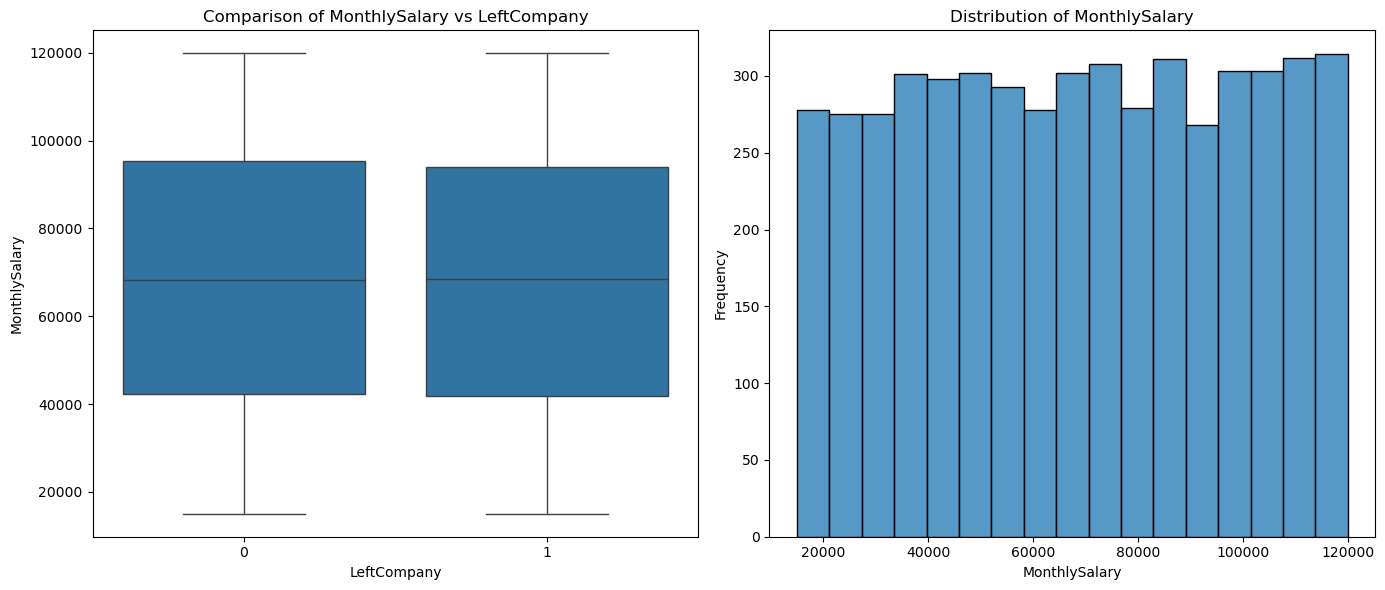

In [18]:
NumericalVariables_targetPlots(df,segment_by="MonthlySalary")

The analysis shows that monthly salary is not a major reason of leaving the company, but with spread of LeftCompany slightly lower than the other in box plot shows that there is a slight chance that less pay can become the reason for attrition.

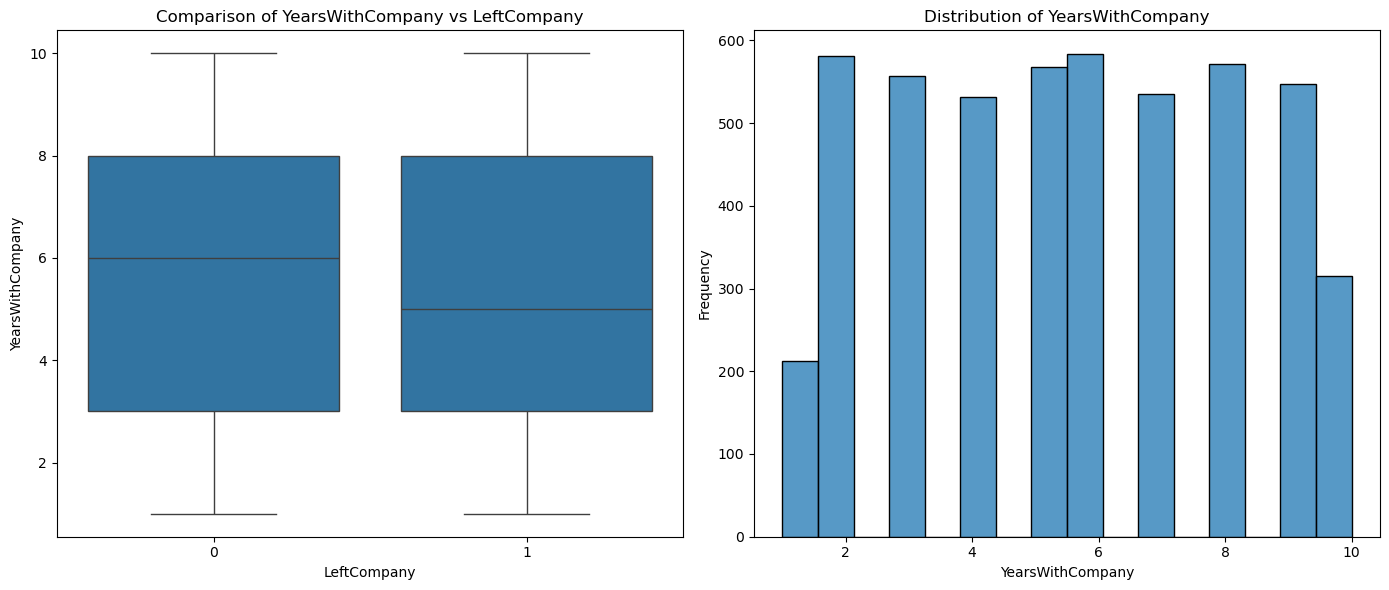

In [19]:
NumericalVariables_targetPlots(df,segment_by="YearsWithCompany")

According to the box plot analysis, the median of LeftCompany is toward the lower end than StayinCompany whose is on the upper end => there is company loyalty, after spending so many years at the company people don't leave, but the lesser the years with company and other reasons like less pay, young age, too much distance from home, etc could lead to employee attrition.
So YearsWithCompany is domino factor in attrition.

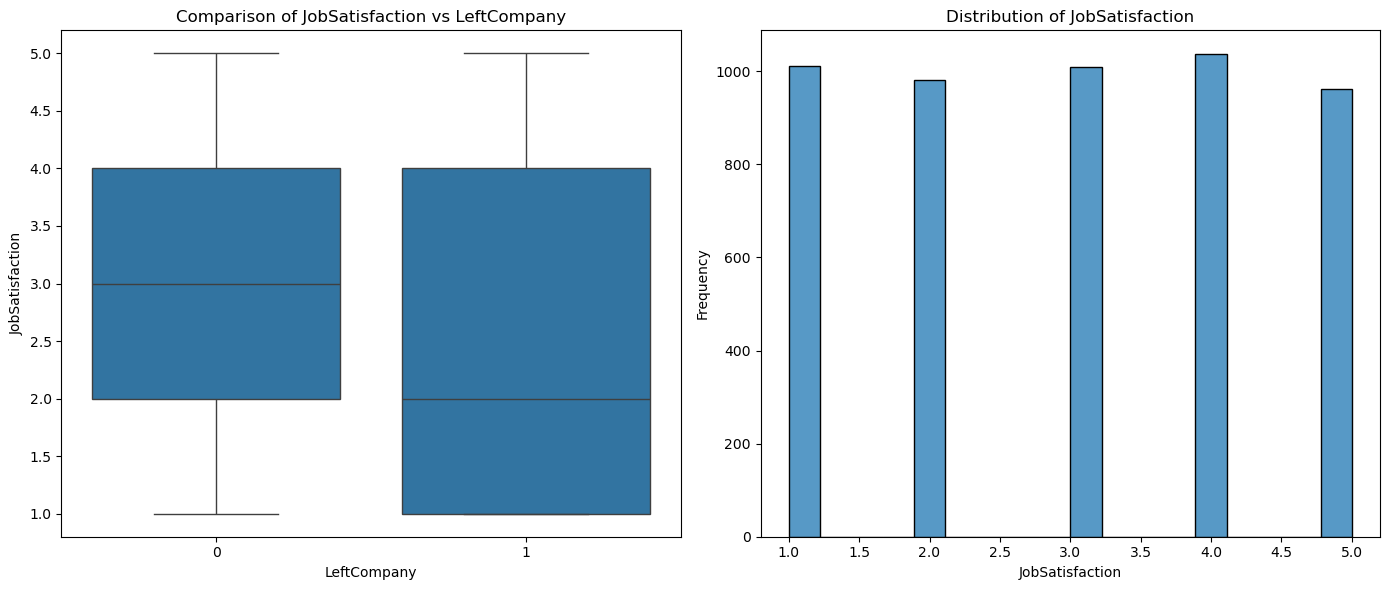

In [20]:
NumericalVariables_targetPlots(df,segment_by="JobSatisfaction")

The Box Plot Analysis shows that the employees who left the company were majorly affected by the job satisfaction level. If they were facing problems with recognition, salary, career advancement, fellow workers, bad working conditions, etc., they are most likely to leave the company.

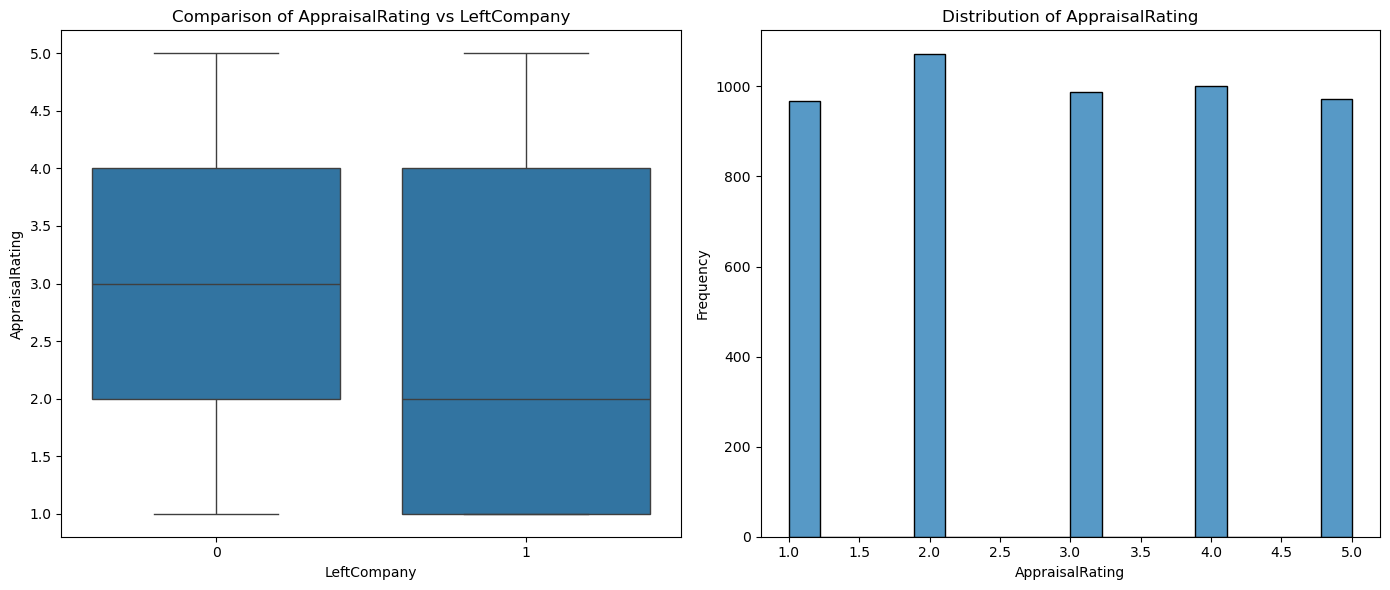

In [21]:
NumericalVariables_targetPlots(df,segment_by="AppraisalRating")

Similar to Job Satisfaction, is Appraisal Rating. Because they were appraised to below par employees of the organization, they are __most definitely going to leave__ the company for another who will identify them for the talent they have.

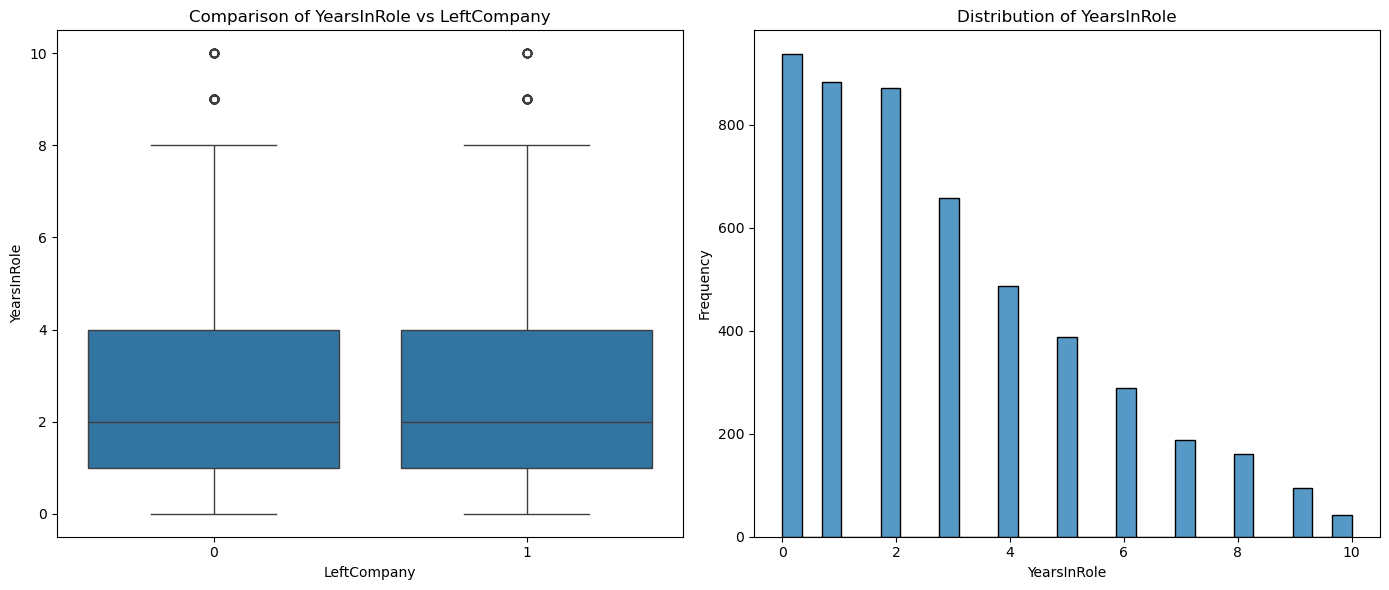

In [22]:
NumericalVariables_targetPlots(df,segment_by="YearsInRole")

The box plot for LeftCompany and StayinCompany for variable YearsInRole is similar. This means that if they are able to advance/get promoted then they are likely to stay while if they don't advance for 4-6 years they are more likely to leave.
We can see the distribution of employees who stayed in the same job role for how many years, there are less employees who stayed in the same role for more than 5 years, unless they didn't have the essential qualifications to advance they are definitely going to add to attrition rate of the company.

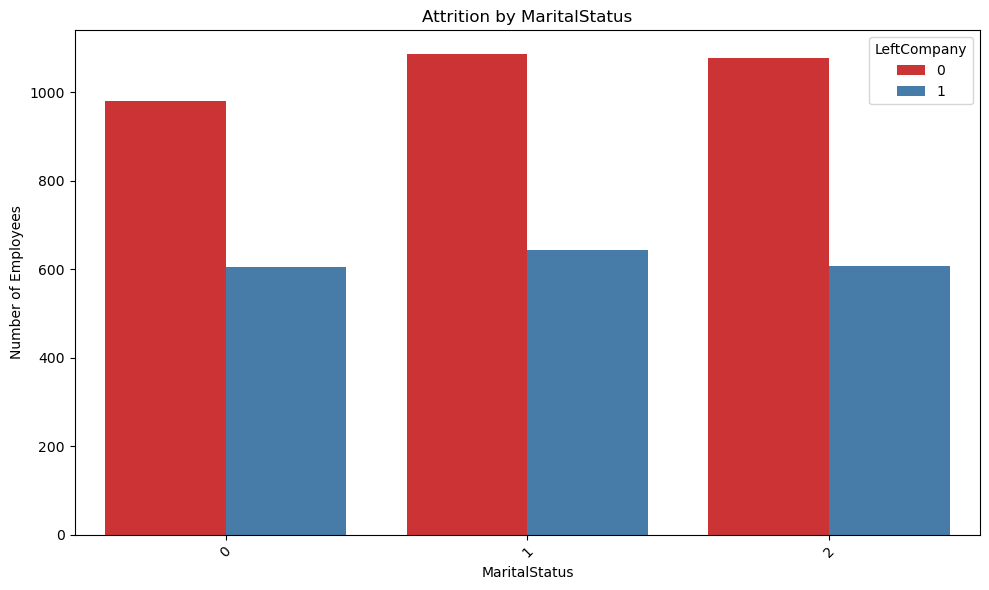

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="MaritalStatus", hue="LeftCompany", palette="Set1")
plt.title("Attrition by MaritalStatus")
plt.xlabel("MaritalStatus")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

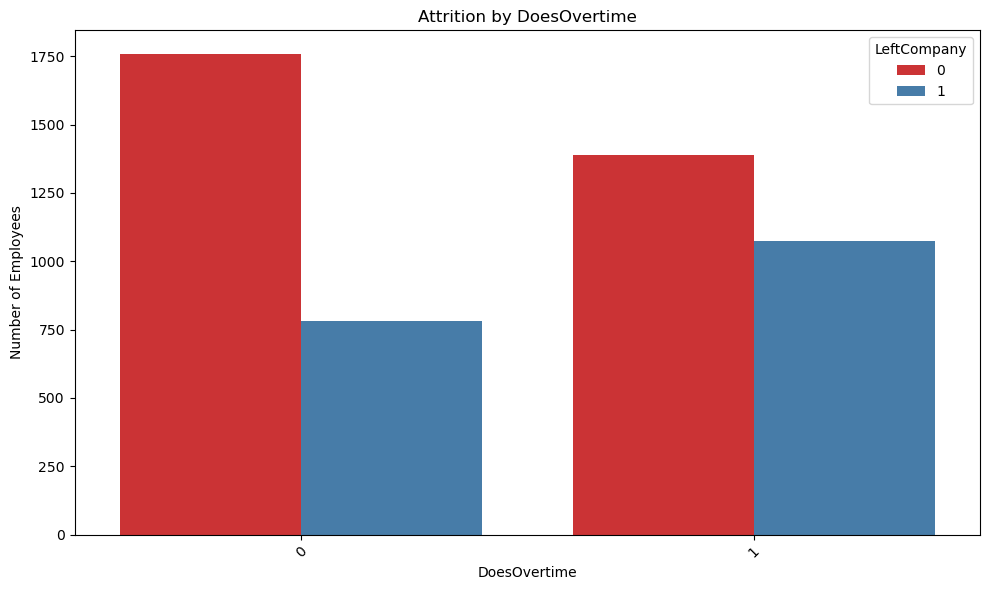

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="DoesOvertime", hue="LeftCompany", palette="Set1")
plt.title("Attrition by DoesOvertime")
plt.xlabel("DoesOvertime")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

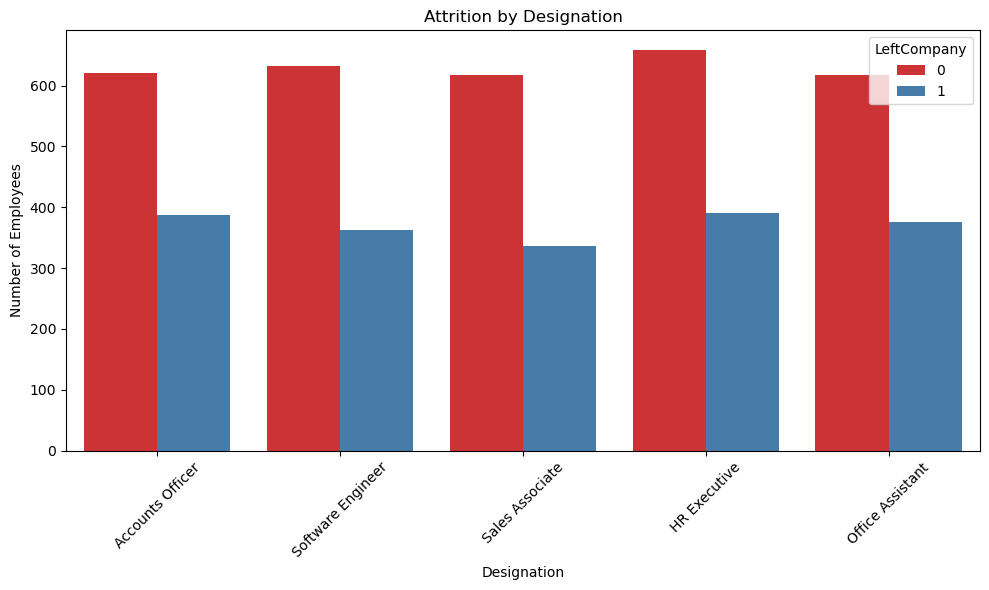

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Designation", hue="LeftCompany", palette="Set1")
plt.title("Attrition by Designation")
plt.xlabel("Designation")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

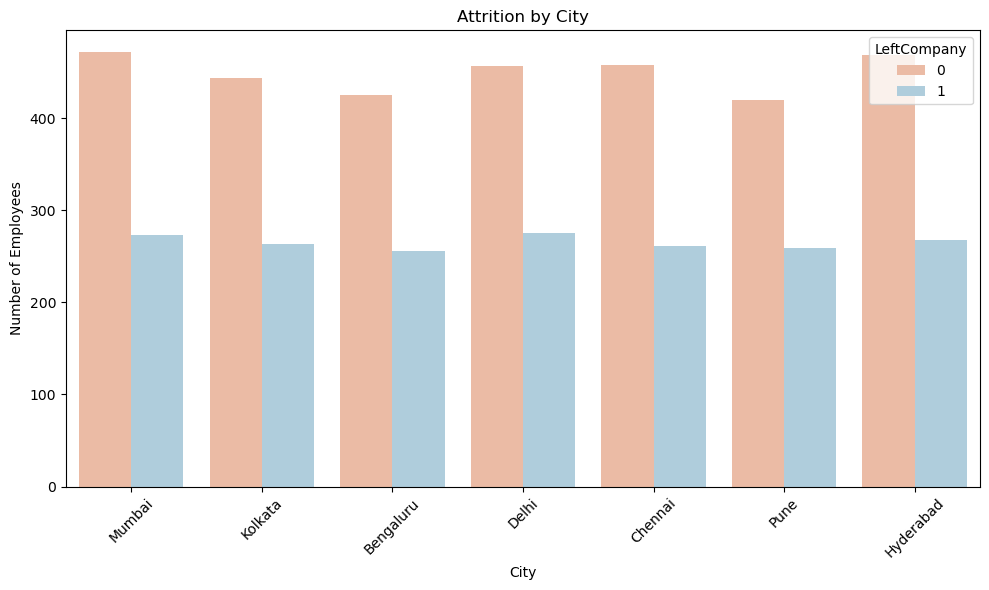

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="City", hue="LeftCompany", palette="RdBu")
plt.title("Attrition by City")
plt.xlabel("City")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Marital Status - Married employees are slightly more likely to leave
### Does Overtime - Major reason to leave if they are not recognized for the overtime pay or hardwork.
### Designation - It does not have much influence over employee leaving(unless they are working in the wrong field)
### City - It does not influence the attrition rate

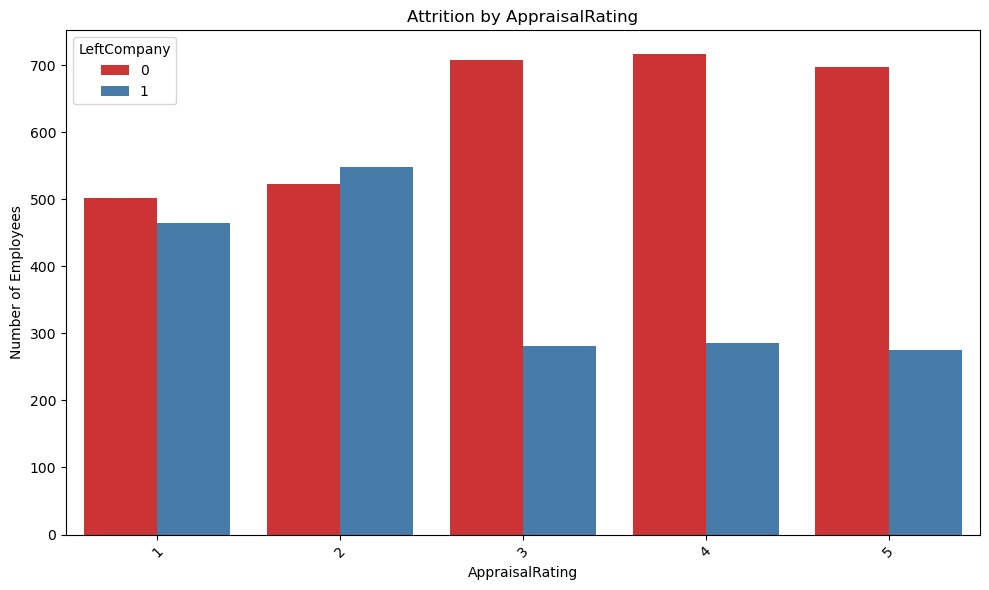

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="AppraisalRating", hue="LeftCompany", palette="Set1")
plt.title("Attrition by AppraisalRating")
plt.xlabel("AppraisalRating")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
df.AppraisalRating.value_counts()

AppraisalRating
2    1071
4    1002
3     988
5     972
1     967
Name: count, dtype: int64

In [29]:
round(df.AppraisalRating.value_counts()/df.shape[0] * 100,2)

AppraisalRating
2    21.42
4    20.04
3    19.76
5    19.44
1    19.34
Name: count, dtype: float64

In [30]:
df.WorkLifeBalance.value_counts()

WorkLifeBalance
4    1257
2    1254
1    1246
3    1243
Name: count, dtype: int64

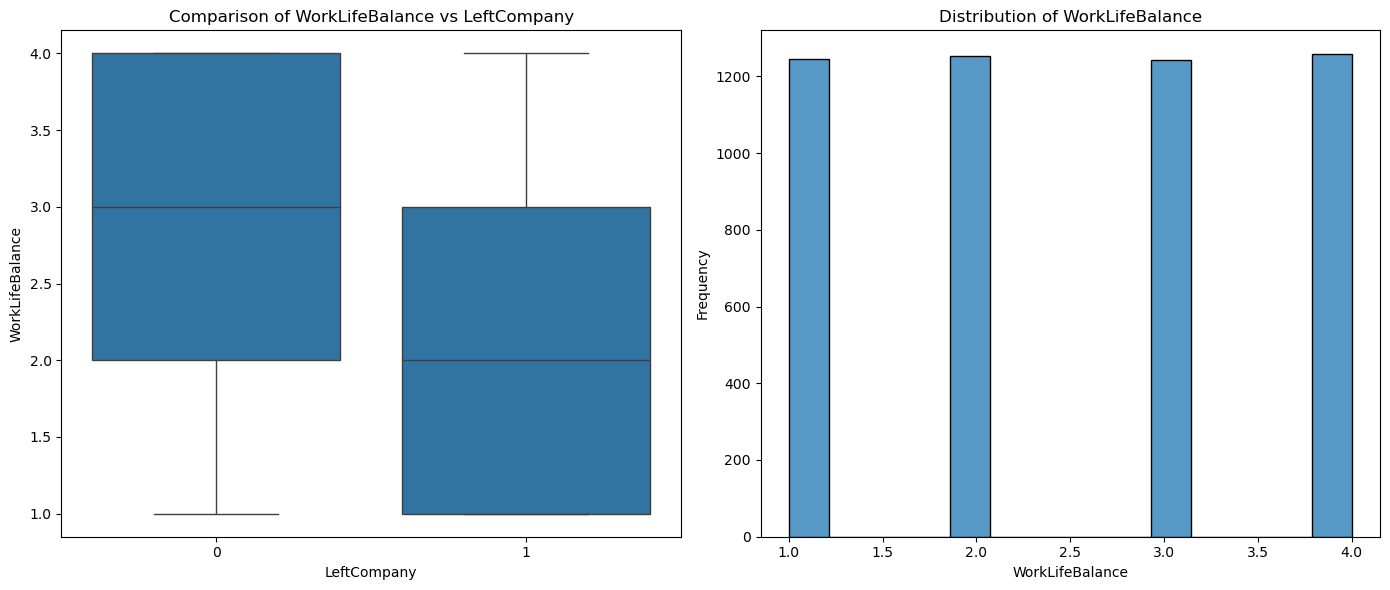

In [31]:
NumericalVariables_targetPlots(df,segment_by="WorkLifeBalance")

In [32]:
round(df.WorkLifeBalance.value_counts()/df.shape[0],2)

WorkLifeBalance
4    0.25
2    0.25
1    0.25
3    0.25
Name: count, dtype: float64

WorkLifeBalance box plot analysis shows overlap of upper quartile of those who left with lower quartile with those who stayed. The employees who had work life balance was 2 or less than that were the ones who left. Major reason for leaving.

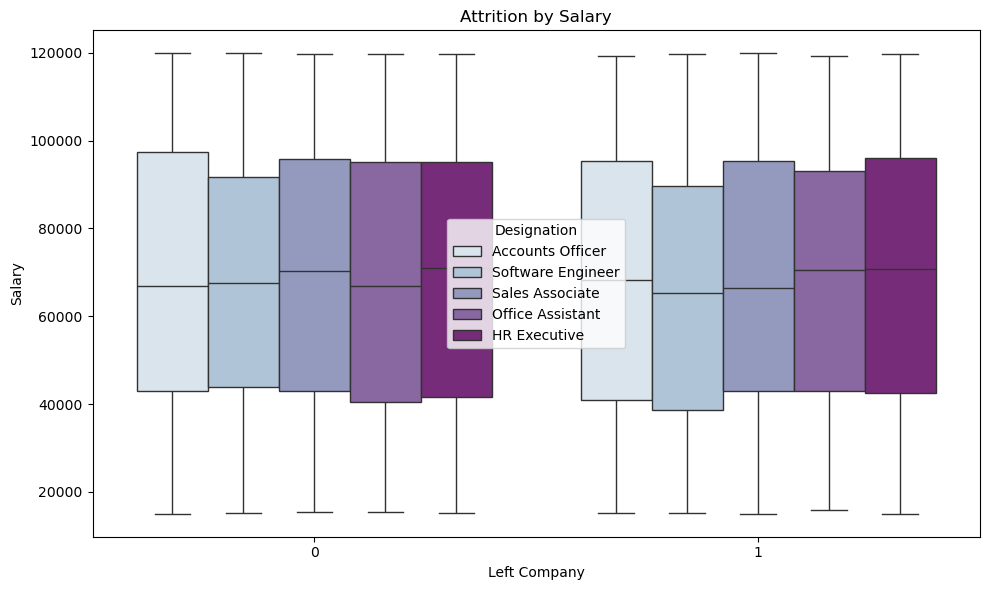

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="LeftCompany", y="MonthlySalary", hue="Designation", palette="BuPu")
plt.title("Attrition by Salary")
plt.xlabel("Left Company")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

Further analysing the salary according to deignation, the outcome is that less the salary that what they percieve as rightful compensation, the more it becomes the major the reason for leaving.
We can see that for every designation the median for box plots of LeftCompany(1) is lower than that of who stayed in company(0).

In [34]:
df.EducationQualification.value_counts()

EducationQualification
M.Com      1029
B.Tech     1017
MBA        1007
BA          985
Diploma     962
Name: count, dtype: int64

In [36]:
df[df["LeftCompany"] == 1]["EducationQualification"].value_counts()

EducationQualification
M.Com      383
MBA        380
Diploma    368
B.Tech     367
BA         357
Name: count, dtype: int64

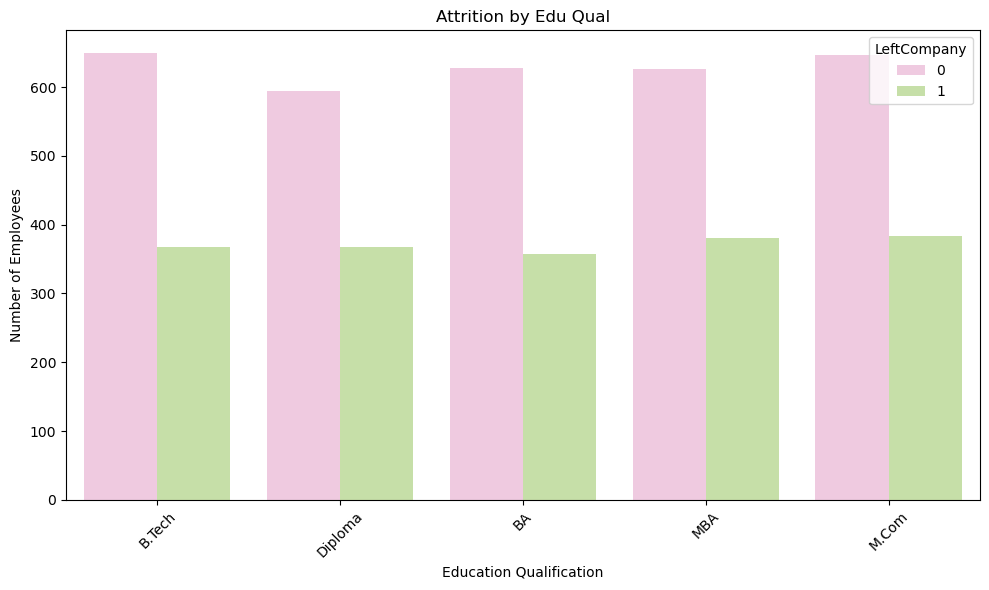

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="EducationQualification", hue="LeftCompany", palette="PiYG")
plt.title("Attrition by Edu Qual")
plt.xlabel("Education Qualification")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

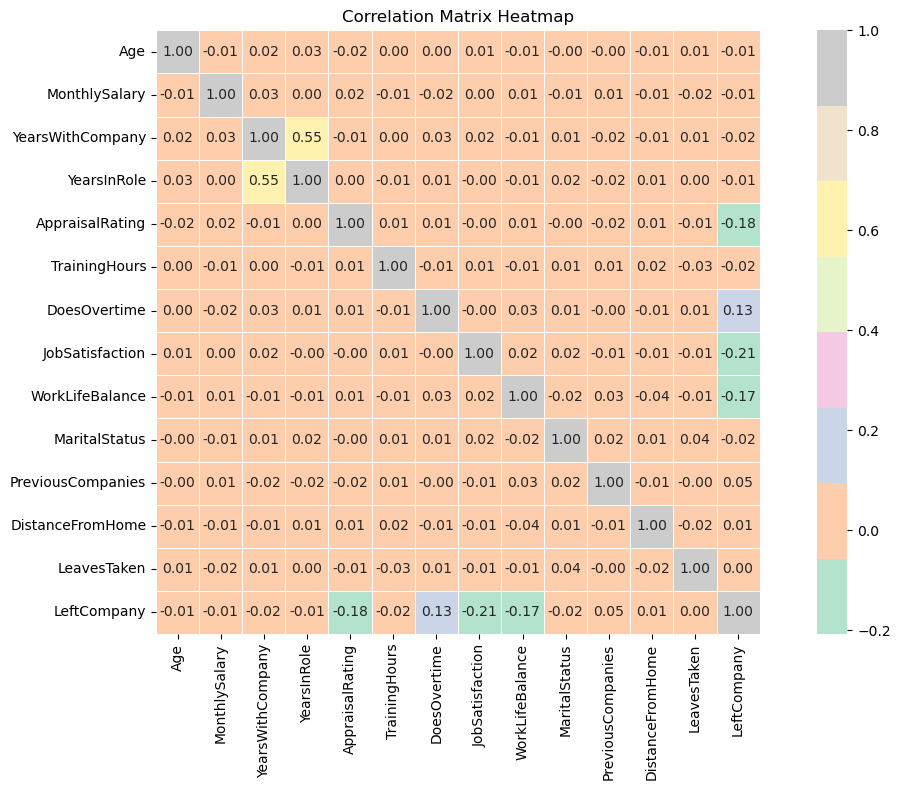

In [88]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Pastel2", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# Final analysis
### Appraisal Rating, Job Satisfaction, Work Life Balance, Does Over time are the major factors influencing employee attrition.

# Creating dummies for categorical variables 
This process, also known as one-hot encoding, is essential for preparing categorical data for machine learning algorithms that require numerical input.

In [89]:
categorical_cols = ['Gender']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df = df.drop(['EmployeeID', 'FullName', 'DateOfJoining'], axis=1)
df = pd.get_dummies(df, columns=['Designation', 'Department', 'EducationQualification', 'City'], drop_first=True)

df.head()

,Age,Gender,MonthlySalary,YearsWithCompany,YearsInRole,AppraisalRating,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,...,EducationQualification_BA,EducationQualification_Diploma,EducationQualification_M.Com,EducationQualification_MBA,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune
0,48,2,111813,5,0,3,37,1,4,3,...,False,False,False,False,False,False,False,False,True,False
1,26,0,87425,5,2,3,39,0,2,2,...,False,False,False,False,False,False,False,True,False,False
2,40,1,86461,4,4,2,32,0,2,3,...,False,True,False,False,False,False,False,False,False,False
3,54,2,23720,2,2,1,21,1,4,4,...,False,True,False,False,False,False,False,True,False,False
4,51,2,39041,7,1,1,30,0,2,2,...,False,False,False,False,False,True,False,False,False,False


Since the dummies converted the variables to True/False values we can convert them to boolean values for speed in the machine learning algorithm.

In [90]:
dummy_cols = df.select_dtypes(include='bool').columns
df[dummy_cols] = df[dummy_cols].astype(int)

df.head()

,Age,Gender,MonthlySalary,YearsWithCompany,YearsInRole,AppraisalRating,TrainingHours,DoesOvertime,JobSatisfaction,WorkLifeBalance,...,EducationQualification_BA,EducationQualification_Diploma,EducationQualification_M.Com,EducationQualification_MBA,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_Pune
0,48,2,111813,5,0,3,37,1,4,3,...,0,0,0,0,0,0,0,0,1,0
1,26,0,87425,5,2,3,39,0,2,2,...,0,0,0,0,0,0,0,1,0,0
2,40,1,86461,4,4,2,32,0,2,3,...,0,1,0,0,0,0,0,0,0,0
3,54,2,23720,2,2,1,21,1,4,4,...,0,1,0,0,0,0,0,1,0,0
4,51,2,39041,7,1,1,30,0,2,2,...,0,0,0,0,0,1,0,0,0,0


# Feature Selection and Data Splitting
In this step, we define the target variable (LeftCompany) and split the dataset into training and test sets. This allows us to train the model on one part of the data and test it on unseen data, ensuring the model generalises well and does not overfit.

In [91]:
target = 'LeftCompany'
X = df.drop(columns=[target])
y = df[target]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (4000, 32), Test Set: (1000, 32)


## Models
1)Logistic Regression  
2)Decision Tree  
3)Random Forest  
4)Gaussian Naive Bayes  
5)K Nearest Neighbour  
6)Support Vector Machine

In [98]:
from sklearn.svm import SVC

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [100]:
pipelines = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000, solver='liblinear')),
    "Decision Tree": make_pipeline(DecisionTreeClassifier(max_depth=5, random_state=42)),
    "Random Forest": make_pipeline(RandomForestClassifier(n_estimators=100, random_state=42)),
    "Naive Bayes": make_pipeline(StandardScaler(), GaussianNB()),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "SVM": make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42))
}

In [101]:
results = {}
for name, pipeline in pipelines.items():
    print(f"Evaluating {name}...")
    scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    results[name] = {
        "Train Accuracy": scores['train_score'].mean(),
        "Validation Accuracy": scores['test_score'].mean()
    }

Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Naive Bayes...
Evaluating KNN...
Evaluating SVM...


In [102]:
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="Validation Accuracy", ascending=False))

                     Train Accuracy  Validation Accuracy
Random Forest              1.000000              0.79425
Decision Tree              0.808812              0.79150
SVM                        0.834937              0.71850
Logistic Regression        0.700813              0.68925
Naive Bayes                0.699000              0.67950
KNN                        0.749625              0.62225


Random Forest has the highest validation accuracy (0.79425), indicating strong predictive performance.  
Random Forest has Train Accuracy = 1.0, which is perfect—this usually suggests overfitting (model memorizes training data instead of learning general patterns).  
  
Decision Tree follows closely with 0.79150.  
In contrast, Decision Tree has slightly lower training accuracy and nearly equal validation accuracy — potentially a better generalizer.  
  
KNN, Naive Bayes, and Logistic Regression have significantly lower validation accuracy, hence are low performing models for this dataset.

In [103]:
from sklearn.metrics import classification_report
for name, pipeline in pipelines.items():
    print(f"\n{name} Evaluation:")
    
    # Fit model on training data
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Evaluation:
Confusion Matrix:
[[562  76]
 [204 158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       638
           1       0.68      0.44      0.53       362

    accuracy                           0.72      1000
   macro avg       0.70      0.66      0.67      1000
weighted avg       0.71      0.72      0.70      1000


Decision Tree Evaluation:
Confusion Matrix:
[[593  45]
 [155 207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       638
           1       0.82      0.57      0.67       362

    accuracy                           0.80      1000
   macro avg       0.81      0.75      0.76      1000
weighted avg       0.80      0.80      0.79      1000


Random Forest Evaluation:
Confusion Matrix:
[[594  44]
 [153 209]]

Classification Report:
              precision    recall  f1-score   support

         

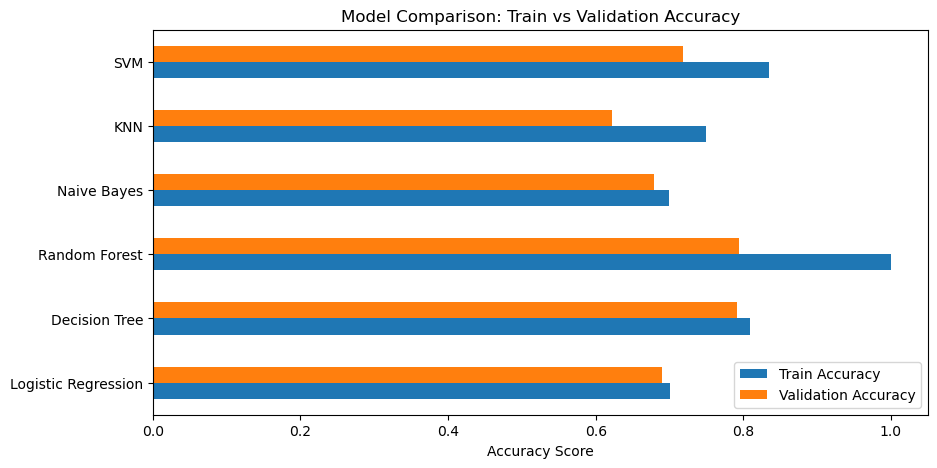

In [104]:
results_df.plot(kind="barh", figsize=(10,5), title="Model Comparison: Train vs Validation Accuracy")
plt.xlabel("Accuracy Score")
plt.show()

In [105]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [106]:
metrics_results = {}
probs_results = {}

for name, pipeline in pipelines.items():
    print(f"Evaluating {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps.get('svc', None), "predict_proba") or hasattr(pipeline.named_steps.get('logisticregression', None), "predict_proba") else None

    metrics_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    }
    
    if y_proba is not None:
        probs_results[name] = y_proba


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Naive Bayes...
Evaluating KNN...
Evaluating SVM...


In [107]:
metrics_df = pd.DataFrame(metrics_results).T.round(3)
print(metrics_df.sort_values(by='F1 Score', ascending=False))


                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Random Forest           0.803      0.826   0.577     0.680      NaN
Decision Tree           0.800      0.821   0.572     0.674      NaN
SVM                     0.735      0.696   0.475     0.565    0.741
Logistic Regression     0.720      0.675   0.436     0.530    0.716
Naive Bayes             0.712      0.662   0.417     0.512      NaN
KNN                     0.585      0.396   0.279     0.327      NaN


Random Forest has the highest F1 Score (0.680) and Accuracy (0.803), showing strong balance between precision and recall.  
Decision Tree is very close behind, suggesting it can be a lighter alternative if interpretability is a priority.  
  
SVM and Logistic Regression:Slightly lower F1 Scores than tree-based models.  
SVM has the highest ROC AUC (0.741) — meaning it has better capability in ranking predictions (i.e., separating classes), even if recall is modest.  
KNN and Naive Bayes underperform across all metrics, especially recall, which is crucial for identifying attrition cases (Class 1).

Best Model: Random Forest


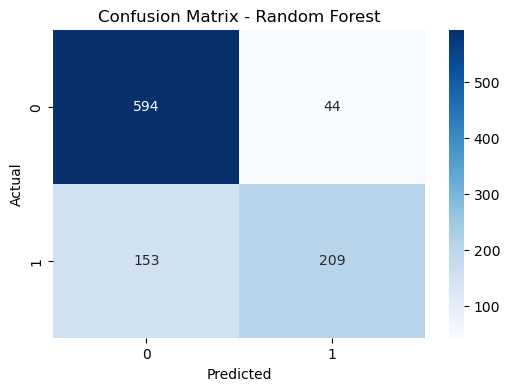

In [108]:
best_model = metrics_df['F1 Score'].idxmax()
print(f"Best Model: {best_model}")

# Refit the best model to plot confusion matrix
final_model = pipelines[best_model]
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

In [109]:
from sklearn.metrics import auc

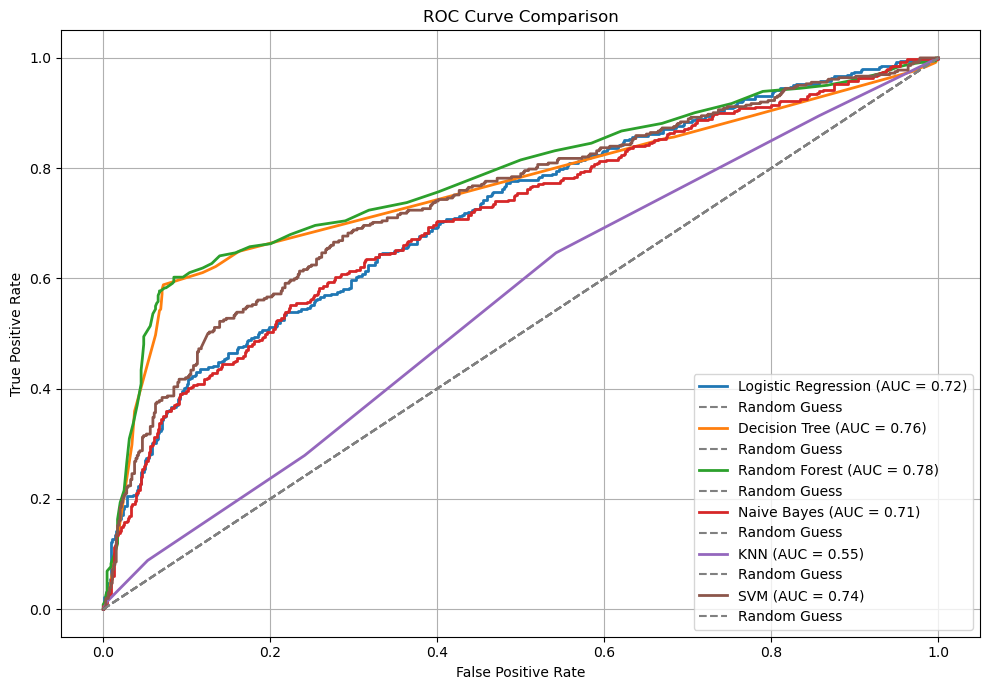

In [110]:
probs_results = {}

# Train all models and collect their probability predictions
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    try:
        # Try to get probabilities
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        probs_results[name] = y_proba
    except AttributeError:
        print(f"{name} does not support predict_proba.")

# Plotting ROC Curves
plt.figure(figsize=(10, 7))

for name, y_proba in probs_results.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
from sklearn.metrics import roc_auc_score

auc_scores = {name: roc_auc_score(y_test, y_proba) for name, y_proba in probs_results.items()}
pd.DataFrame.from_dict(auc_scores, orient="index", columns=["ROC AUC"]).sort_values(by="ROC AUC", ascending=False)


,ROC AUC
Random Forest,0.780811
Decision Tree,0.760946
SVM,0.740823
Logistic Regression,0.716149
Naive Bayes,0.707585
KNN,0.554274


## Feature Importance 
After training the model, we analyse which features had the most impact on predicting employee attrition. Understanding feature importance helps us identify key drivers behind an employee's decision to leave, which provides valuable insights for HR to improve retention strategies.

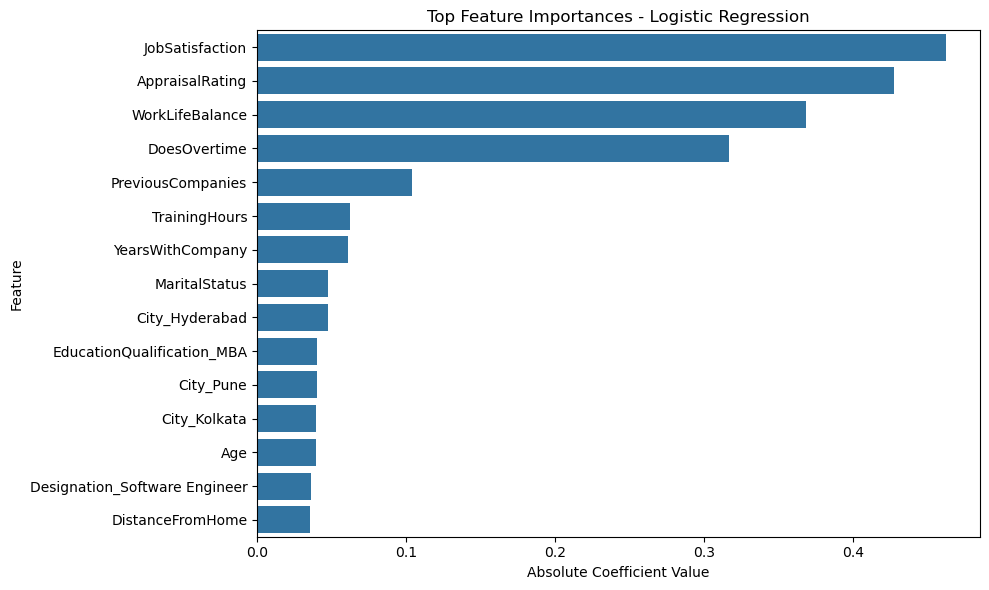

In [112]:
feature_names = X_train.columns

# Get coefficients from the model
coefficients = model.coef_[0]

# Create DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))  # Top 15 features
plt.title('Top Feature Importances - Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

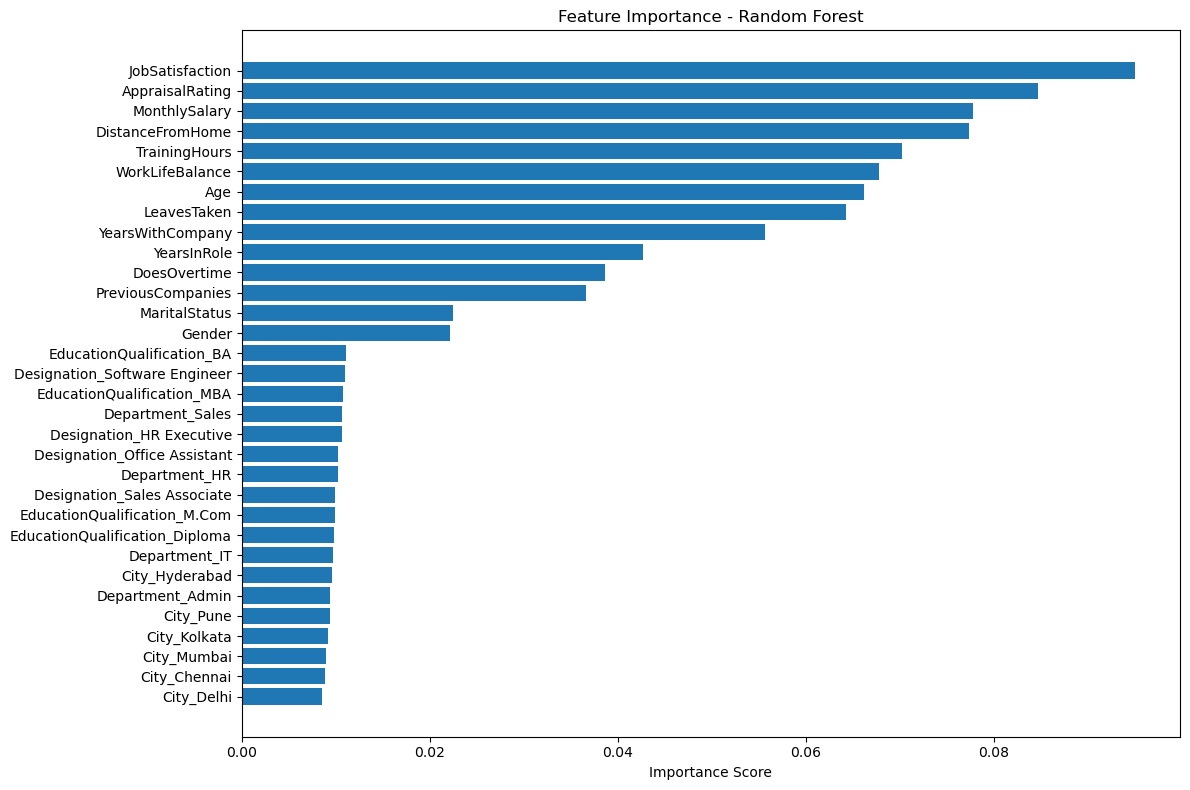

In [116]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# 3. Sort and visualize
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

# Employee Attrition Prediction 
### Model Used - Random Forest

In [114]:
# Step 1: Define the model
rf = RandomForestClassifier(random_state=42)

# Step 2: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Step 3: Set up the Grid Search (tuning the model for better results)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,              # 5-fold cross-validation
                           scoring='roc_auc', # or 'accuracy', 'f1'
                           n_jobs=-1,         # Use all available cores
                           verbose=2)

# Step 4: Fit the model
grid_search.fit(X_train, y_train)

# Step 5: View best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Step 6: Predict using the best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Step 7: Evaluation
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC AUC Score: 0.7688657985886047
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       638
           1       0.82      0.57      0.68       362

    accuracy                           0.80      1000
   macro avg       0.81      0.75      0.77      1000
weighted avg       0.80      0.80      0.79      1000



# Recommendations for HR

* Conduct anonymous job satisfaction surveys regularly.

* Create transparent career growth paths (internal job postings, mentorships).

* Encourage employee engagement (team building, recognition programs). Provide wellness benefits (e.g., yoga, counseling, gym memberships).

* Implement 360-degree feedback (peer, manager, self, subordinate) and increase frequency of feedback (e.g., quarterly check-ins instead of annual).

* Train managers on bias-free and constructive performance reviews. Tie rewards (bonuses, promotions) more transparently to performance metrics.

* Set clear boundaries on working hours. Monitor and cap weekly working hours.

* Offer flexible working hours, hybrid/remote options, or compressed workweeks.Allow employees to transfer to closer branches.

* Provide adequate (don't discourage) vacation time and regular breaks.

* Provide company shuttle services or travel reimbursements.

* Ensure adequate staffing to reduce workload pressure or offer comp time or overtime pay where unavoidable.

* Benchmark salaries regularly against industry standards. Provide transparent pay bands and performance-based increments.

* Add non-monetary benefits (stock options, insurance, paid training).

Ideal but practical for good working environment, especially when rewards/incentives are tied up with work and performance.